In [1]:
# rf = Roboflow(api_key="cEYkch18yM6B8mdIyrDA")

In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [4]:
# ultralytics  and roboflow are the companies that have acquired yolov8

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 22.8MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 81.2MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 214.5ms
Speed: 13.8ms preprocess, 214.5ms inference, 1373.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


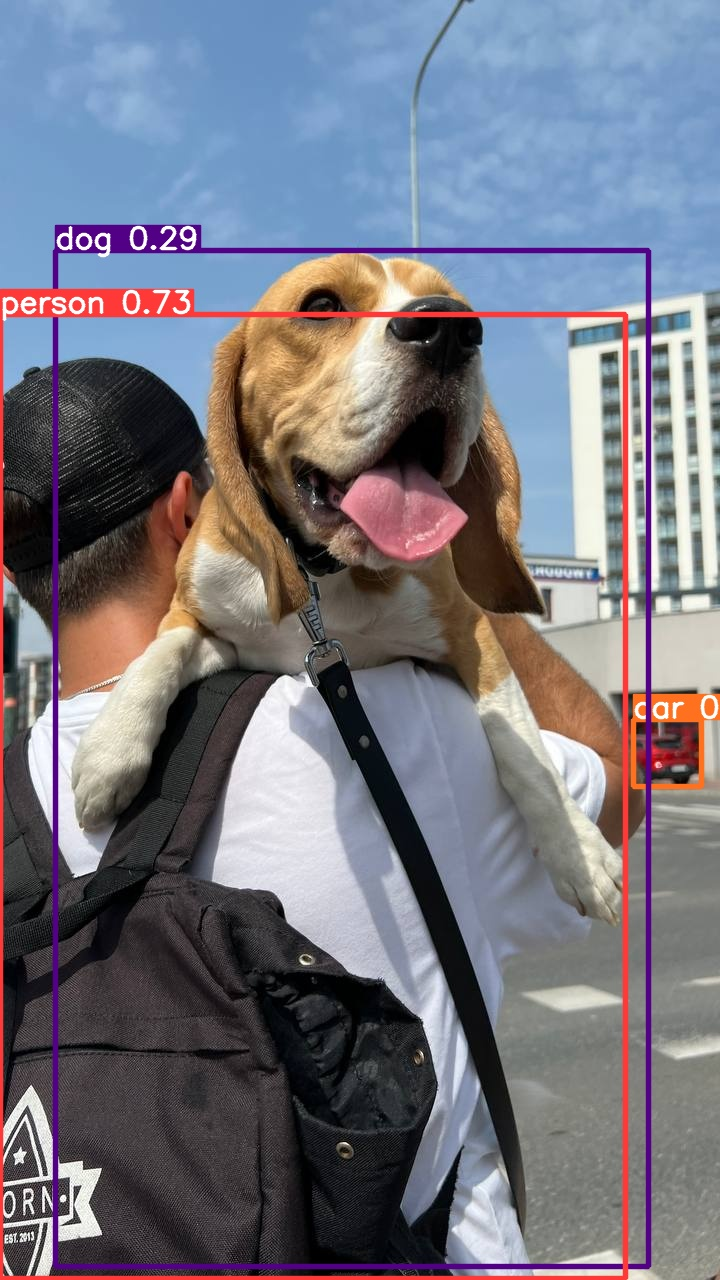

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# **LOADING OUR DATA**

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="EzcoefMkgz0NAdeYv6MU")
project = rf.workspace("helmet-detection-sutvo").project("traffic-signals-wxmow")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Signals-2 in yolov8:: 100%|██████████| 4446/4446 [00:00<00:00, 7077.23it/s]


In [12]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Traffic-Signals-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visuali

In [16]:
!ls {HOME}/runs/detect/train2/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1716306773.cd32cc8a1378.11551.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch4680.jpg  weights
P_curve.png					     train_batch4681.jpg
PR_curve.png					     train_batch4682.jpg


/content


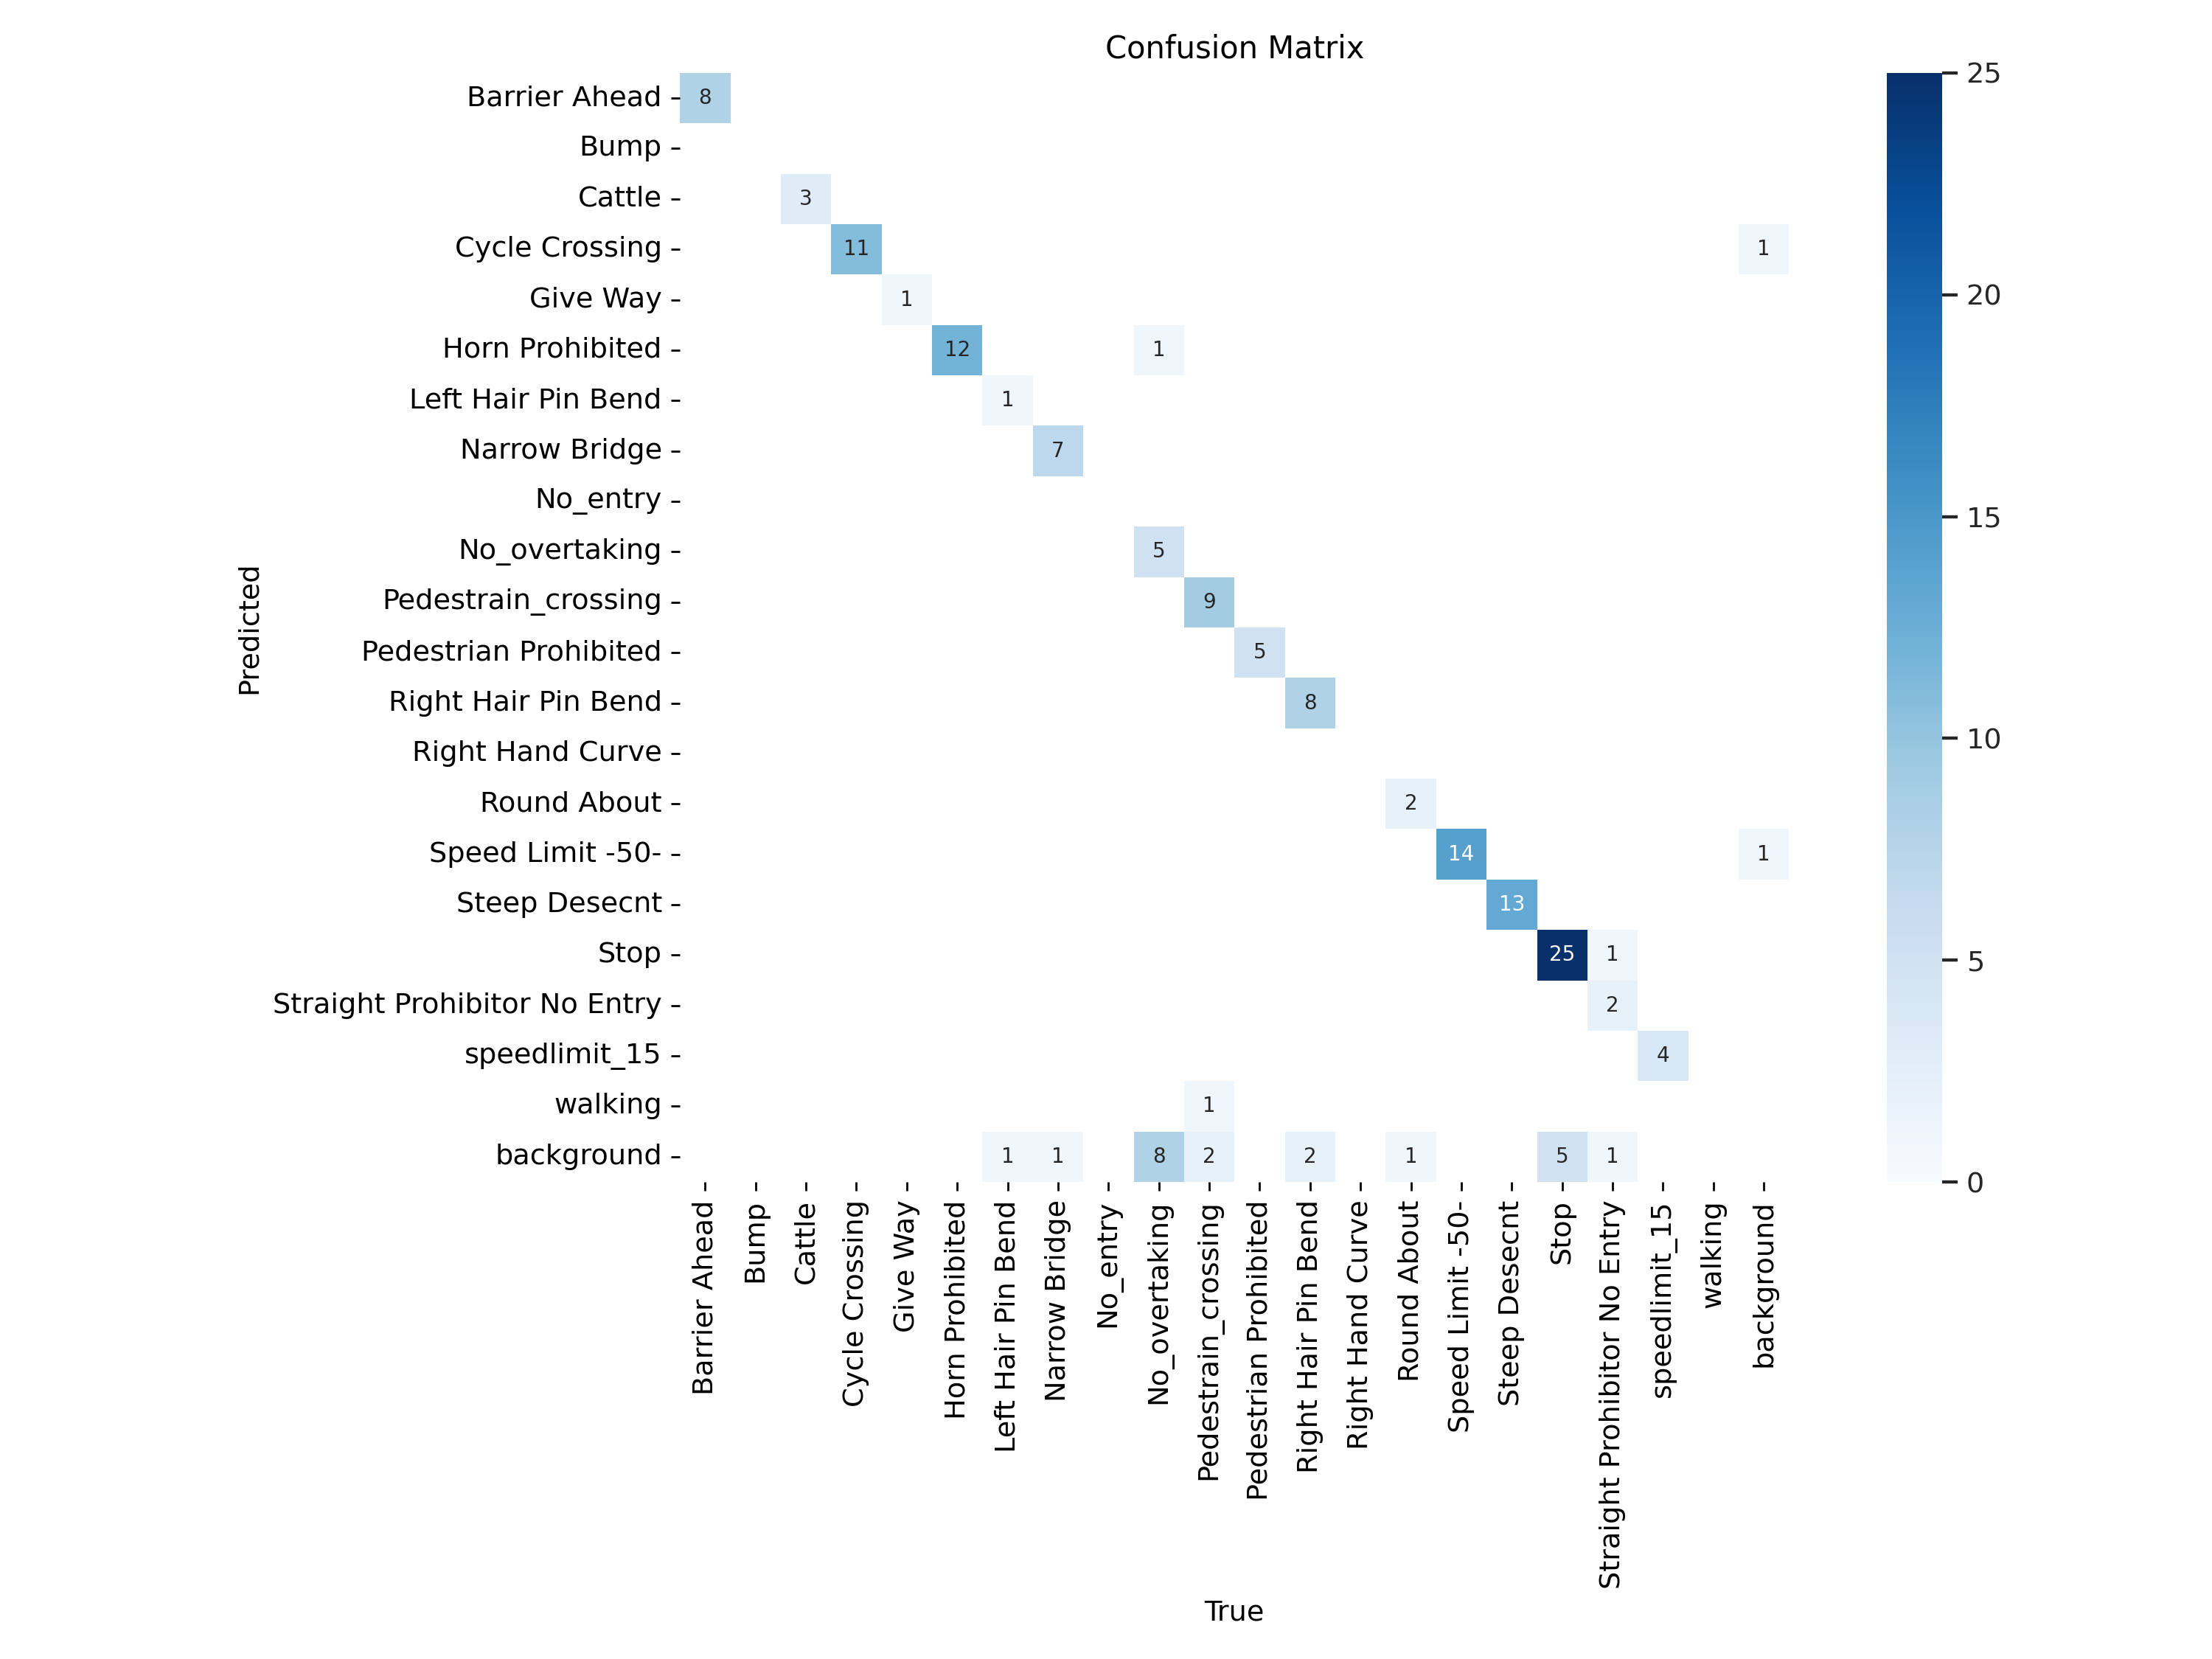

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


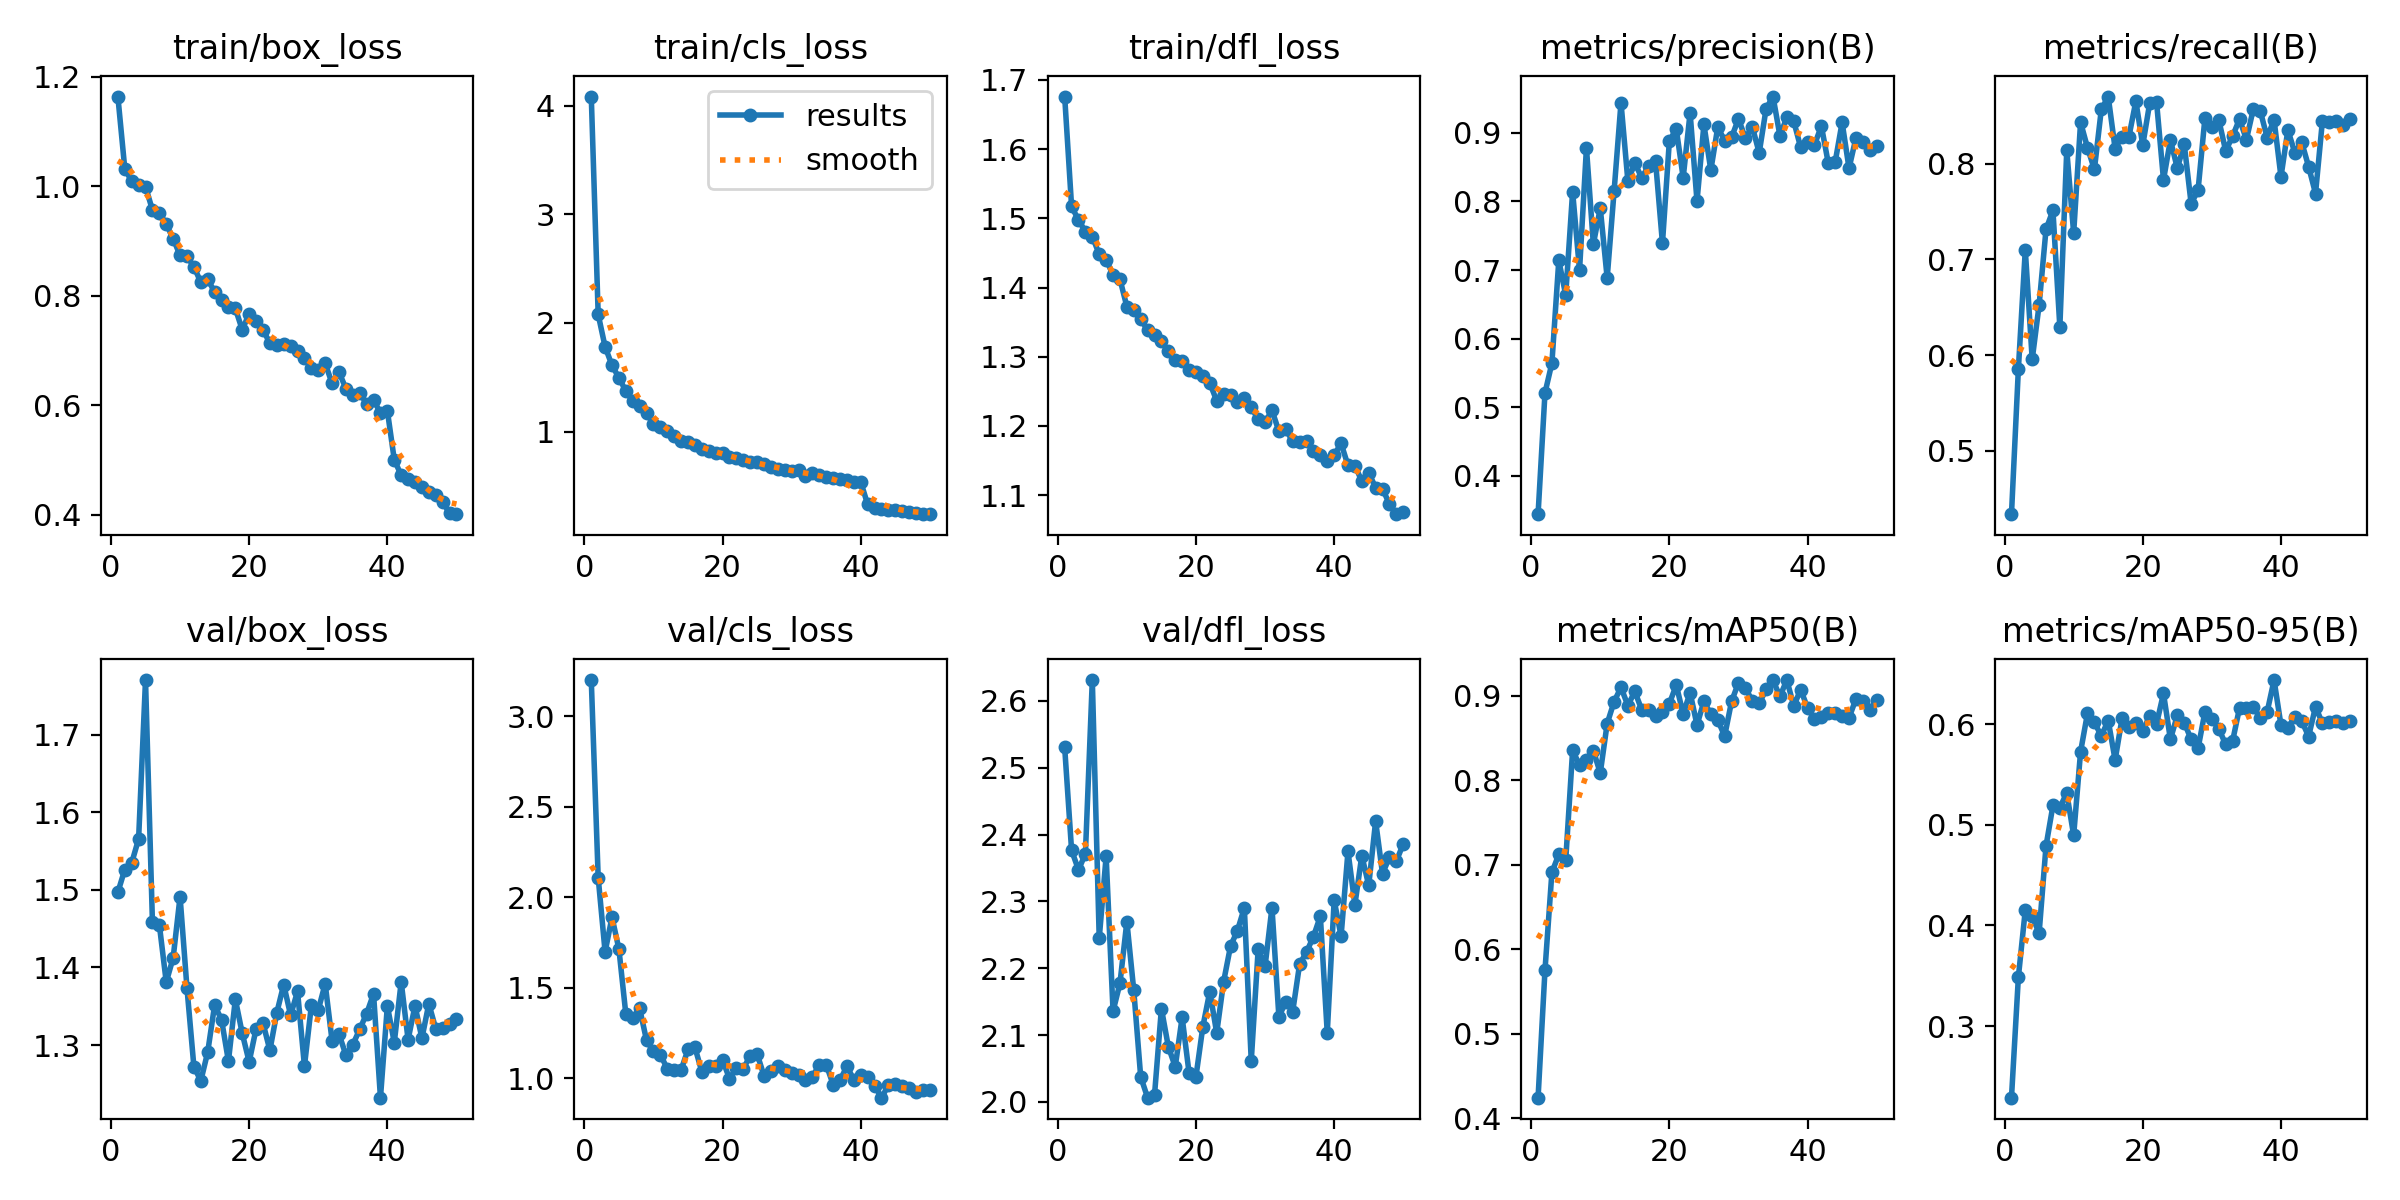

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


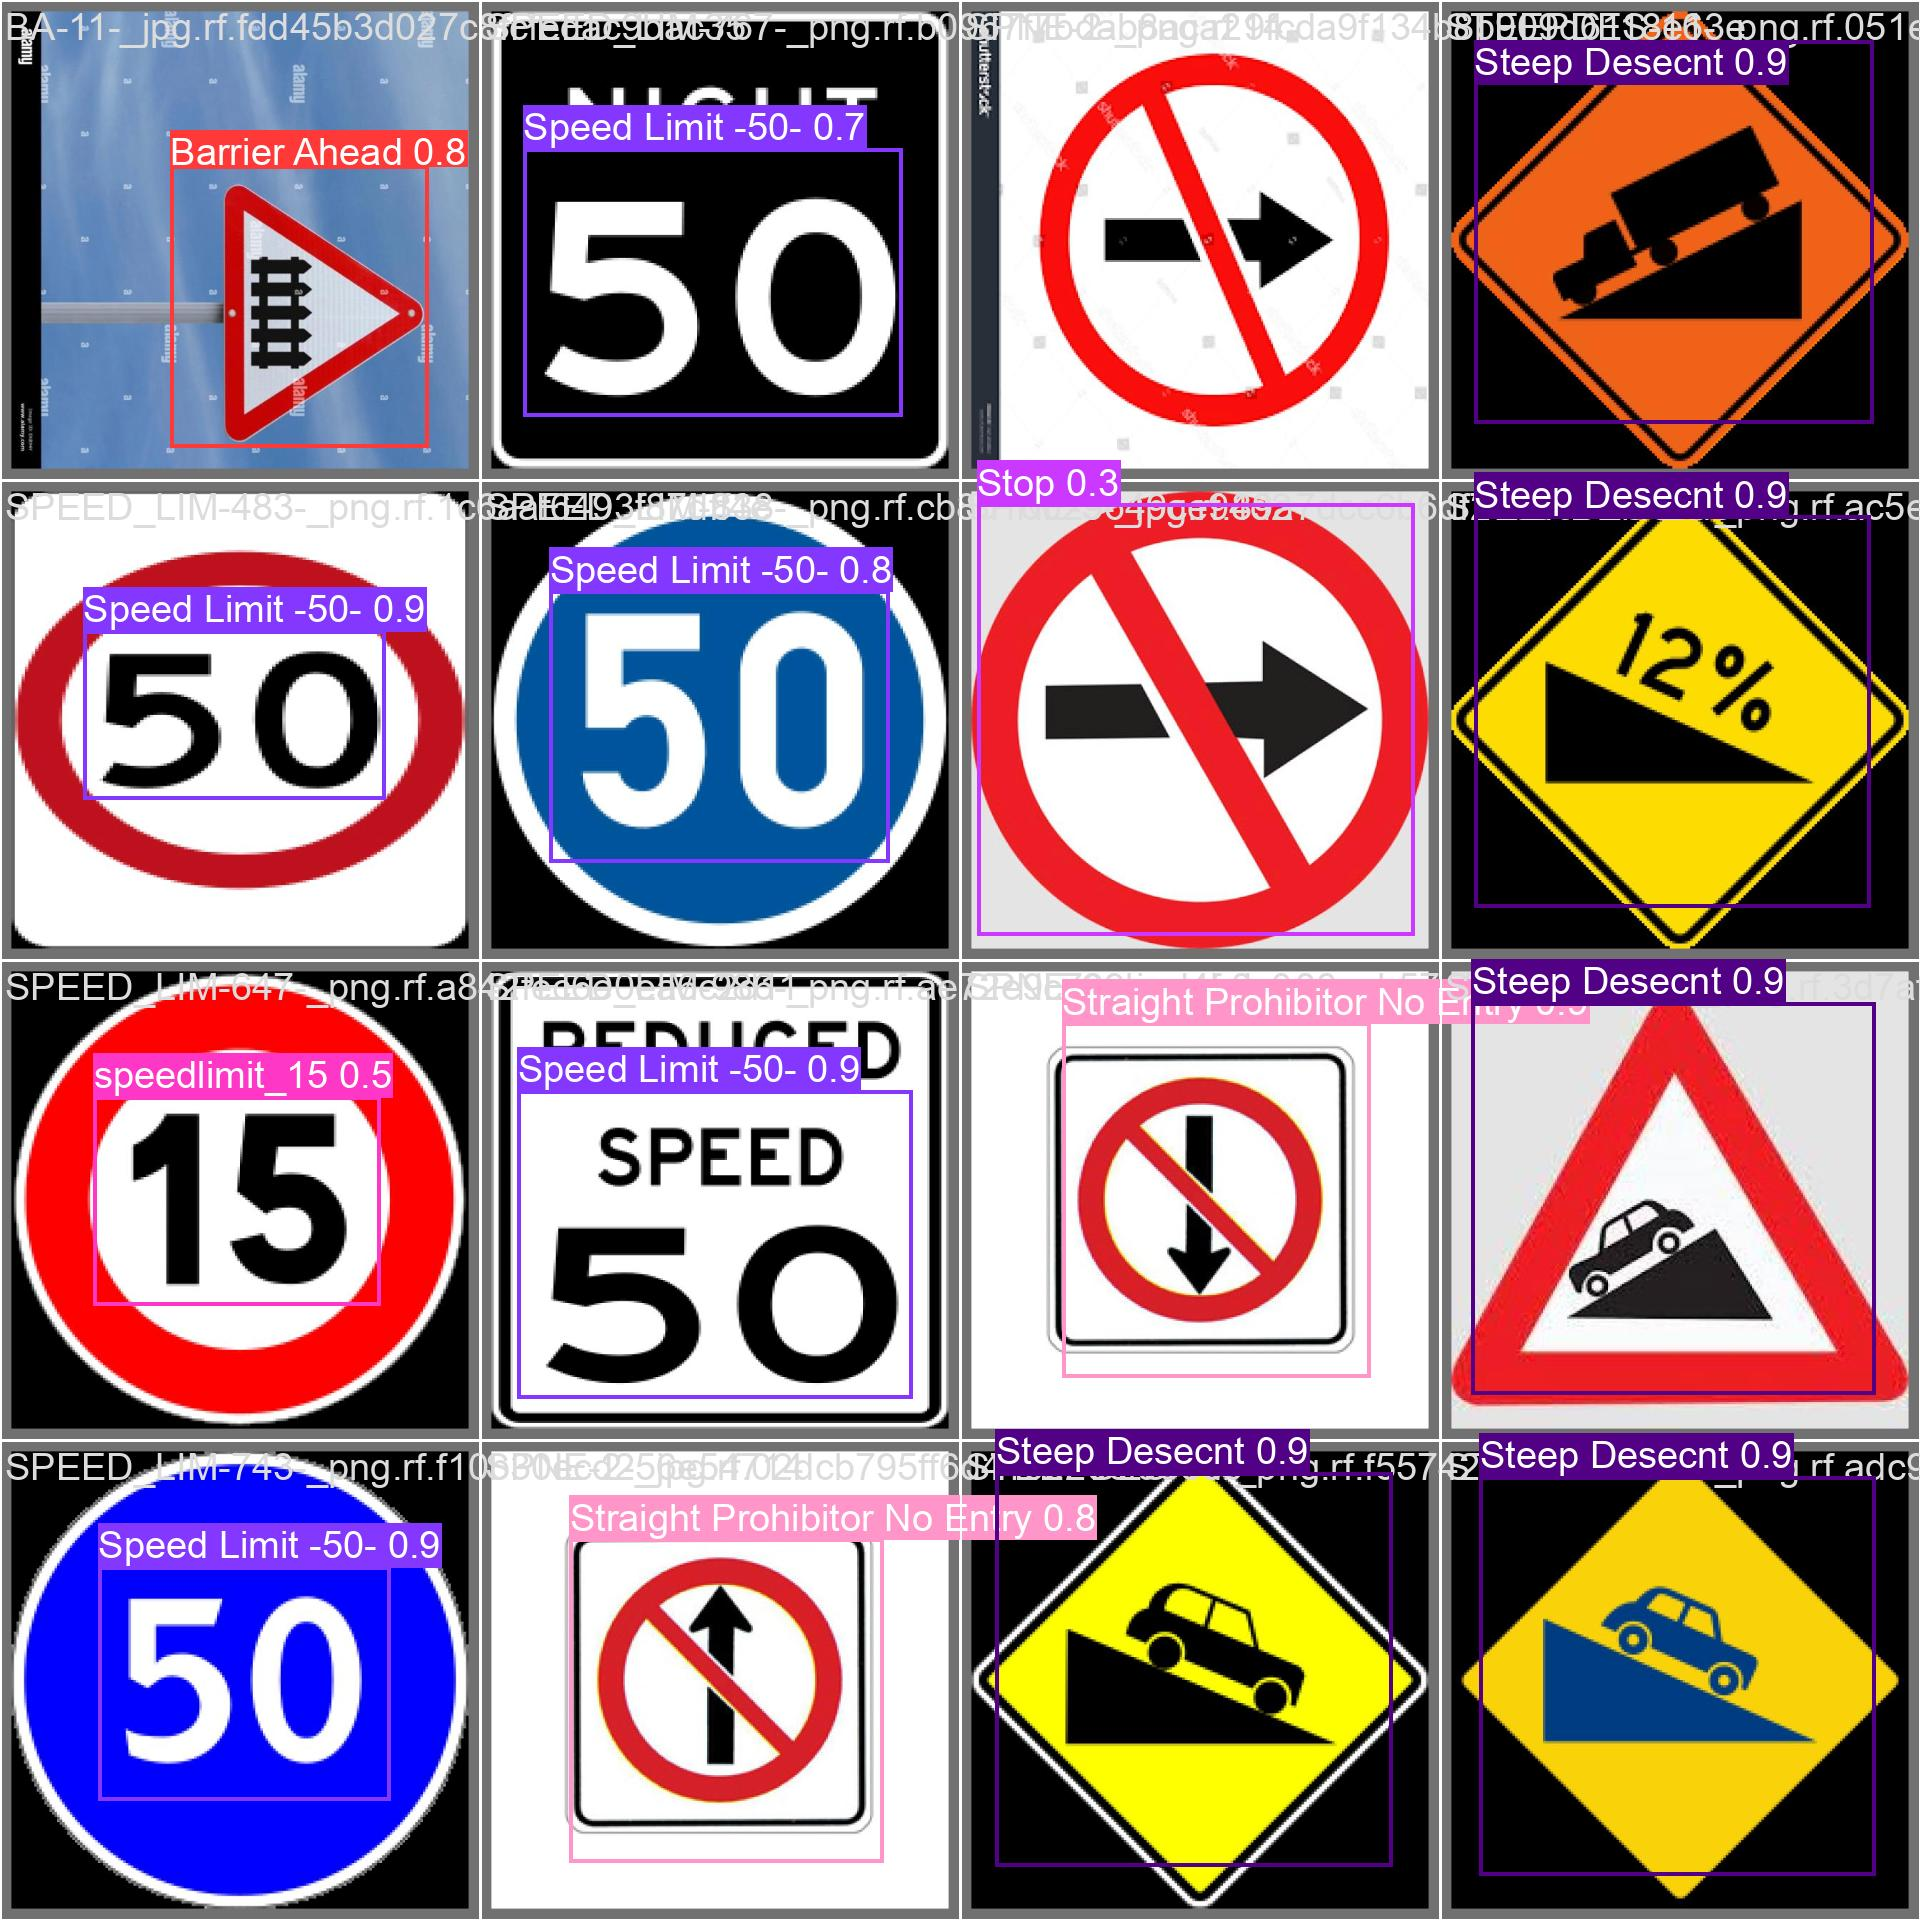

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

image 1/177 /content/datasets/Traffic-Signals-2/test/images/BA-10-_jpg.rf.2ff941b0acb56ab1c9b9b1451a6f0cbe.jpg: 640x640 1 Barrier Ahead, 16.4ms
image 2/177 /content/datasets/Traffic-Signals-2/test/images/BA-11-_png.rf.8201cd77c7cf666108d70746154b2d95.jpg: 640x640 1 Barrier Ahead, 16.4ms
image 3/177 /content/datasets/Traffic-Signals-2/test/images/BA-12-_jpg.rf.9b0ea1e3d8c01733e682539253e6595a.jpg: 640x640 1 Barrier Ahead, 16.3ms
image 4/177 /content/datasets/Traffic-Signals-2/test/images/BA-13-_png.rf.98698dbf59efbf69c7eefc0a25e41cbe.jpg: 640x640 1 Barrier Ahead, 16.4ms
image 5/177 /content/datasets/Traffic-Signals-2/test/images/BA-16-_png.rf.71fb9eb67bdd8aa67fa058d62248e044.jpg: 640x640 1 Barrier Ahead, 16.3ms
image 6/177 /content/datasets/Traffic-Signals-2/test/images/BA-20-_png.rf.213147109855c89ea03d2c941b0

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/86 Traffic Signs in India – Road Safety Signs & Symbol with their meanings in Hindi.mp4" save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/847) /content/86 Traffic Signs in India – Road Safety Signs & Symbol with their meanings in Hindi.mp4: 384x640 (no detections), 117.2ms
video 1/1 (2/847) /content/86 Traffic Signs in India – Road Safety Signs & Symbol with their meanings in Hindi.mp4: 384x640 (no detections), 10.8ms
video 1/1 (3/847) /content/86 Traffic Signs in India – Road Safety Signs & Symbol with their meanings in Hindi.mp4: 384x640 (no detections), 10.7ms
video 1/1 (4/847) /content/86 Traffic Signs in India – Road Safety Signs & Symbol with their meanings in Hindi.mp4: 384x640 (no detections), 10.8ms
video 1/1 (5/847) /content/86 Traffic Signs in India – Road Safety Signs & Symbol with their meanings in Hindi.mp4: 384x640 (no detections), 10.7ms
video 1/1 (6/847) /content/86 Traffic Signs in India – Road Safety Signs & Symbo

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/T1.png" save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/T1.png: 640x640 1 Stop, 16.4ms
Speed: 4.6ms preprocess, 16.4ms inference, 527.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


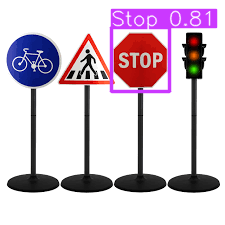

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/T1.png'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/T2.png" save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/T2.png: 640x640 1 Speed Limit -50-, 16.3ms
Speed: 3.6ms preprocess, 16.3ms inference, 570.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


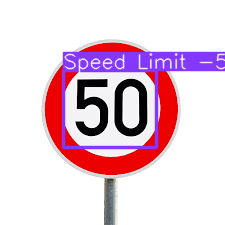

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict6/T2.png'):
      display(Image(filename=image_path, width=700))
      print("\n")

In [29]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/T3.png" save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/T3.png: 640x608 1 Barrier Ahead, 126.9ms
Speed: 4.9ms preprocess, 126.9ms inference, 509.1ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


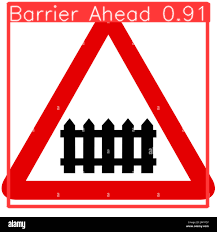

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict7/T3.png'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [31]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/T4.png" save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/T4.png: 640x640 1 Cycle Crossing, 25.0ms
Speed: 4.4ms preprocess, 25.0ms inference, 887.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


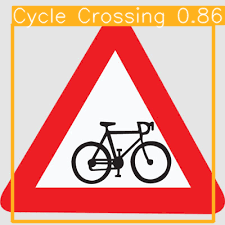

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict8/T4.png'):
      display(Image(filename=image_path, width=600))
      print("\n")